### Reproduce results of `scipy.stats.skewtest`

In [26]:
from __future__ import division
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Set the seed so results are reproducible.

In [27]:
np.random.seed(123)

Number of samples

In [28]:
N = 30

Generate N samples from the standard normal distribution, compute the skew, and repeat this procedure many times to get a distribution for the skew.

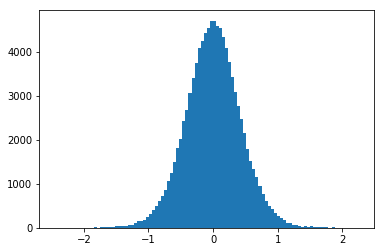

In [29]:
teststats = stats.skew(np.random.normal(size=(N, 100000)), bias=False)
plt.hist(teststats, bins=100);

Compare the sample variance of excess kurtosis with the population variance (see $\text{Var}(G_1)$ https://en.wikipedia.org/wiki/Skewness#Sample_skewness).

In [30]:
pop_var = 6.0*N*(N-1) / ((N-2)*(N+1)*(N+3))
sample_var = np.var(teststats)
print("Population variance = {0}. Sample variance = {1}".format(pop_var, sample_var))

Population variance = 0.182237117721. Sample variance = 0.180045636279


Draw N numbers from the standard uniform distribution and compute the skew.

In [31]:
sample = np.random.uniform(size=N)
observed_skew = stats.skew(sample, bias=False)
print("Sample skew = {0}".format(observed_skew))

Sample skew = 0.569033768536


Now let's compute p-value and z-score using `scipy.stats.skewtest` and try to reproduce the results.

In [32]:
scipy_z, scipy_p = stats.skewtest(sample)
print("Scipy z-score = {0}. Scipy p-value = {1}".format(scipy_z, scipy_p))

Scipy z-score = 1.36463537903. Scipy p-value = 0.172367679312


Reproduce the two-sided p-value.

In [33]:
pval = 2 * min(
    len(teststats[teststats > observed_skew]),
    len(teststats[teststats < observed_skew])
) / len(teststats)
print("Reproduced p-value = {0}".format(pval))

Reproduced p-value = 0.17108


Compute z-score from p-value by mapping the test statistic distribution to the standard normal distribution. We ask: up to what value $\text{p-value} / 2$ worth of probability is captured? We also need to get the sign right: if the sample skew is positive, z-score should be positivie, and vice versa.

In [34]:
zscore = -1 * stats.norm.ppf(pval/2) * np.sign(observed_skew)
print("Reproduced z-score = {0}".format(zscore))

Reproduced z-score = 1.3687417974


Summary of results

In [35]:
print("p-value: Scipy = {0}, Reproduced = {1}".format(scipy_p, pval))
print("z-score: Scipy = {0}, Reproduced = {1}".format(scipy_z, zscore))

p-value: Scipy = 0.172367679312, Reproduced = 0.17108
z-score: Scipy = 1.36463537903, Reproduced = 1.3687417974
